# Gradient Descent
<hr style="border:2px solid black">

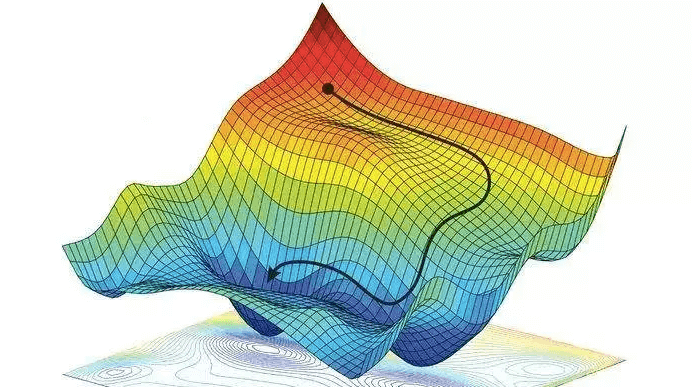

## 1. Introduction

### 1.1 What is Gradient Descent?
- optimization algorithm, commonly used to train machine learning models
- iterative update of parameters $\bf{w}$ by computing loss function at every step 
- model learns from trainig data over time, ultimately minimizing the loss function $J(\bf{w})$
- It is a general term for models that are looking for the best fit. Not only used in linear regression. It only tries to minimize the loss function. 
- After defining the slope and intercept, we start with a pair of number close to the defined slope and intercept.

### 1.2 The Algorithm

**Learning rate** 

> Also referred to as step size $\alpha$, is the size of the steps that are taken to reach the minimum

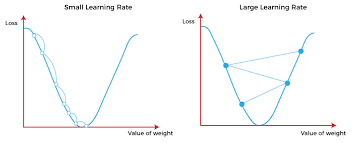

**Parameter update equation**

>$$
w_j \rightarrow w_j - \alpha \frac{\partial J(\bf{w})}{\partial w_j}, \quad j=1,2,\ldots,N
$$

### 1.3 Types of Gradient Descent

**Batch gradient descent**

>Batch gradient descent sums the error for each point in a training set, updating the model only after all training examples have been evaluated. This process referred to as a training epoch.

**Stochastic gradient descent**

>Stochastic gradient descent (SGD) runs a training epoch for each example within the dataset and it updates each training example's parameters one at a time. 

**Mini-batch gradient descent**

>Mini-batch gradient descent combines concepts from both batch gradient descent and stochastic gradient descent. It splits the training dataset into small batch sizes and performs updates on each of those batches. 

### 1.4 Challenges with Gradient Descent

**Local minima and saddle points**

>For convex problems, gradient descent can find the global minimum with ease, but as nonconvex problems emerge, gradient descent can struggle to find the global minimum, where the model achieves the best results.

**Vanishing and exploding gradients**

> If the gradient is too small or too large, it creates problem in deeper neural networks, particular recurrent neural networks

<hr style="border:2px solid black">

## 2. Gradient Descent from Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

### Step 0. Generation of input data

In [2]:
Xtrue = [np.random.randint(1, 100)*0.01 for x in range(1000)]
Xtrue

[0.84,
 0.77,
 0.54,
 0.98,
 0.12,
 0.19,
 0.67,
 0.11,
 0.58,
 0.93,
 0.8,
 0.1,
 0.87,
 0.07,
 0.89,
 0.21,
 0.91,
 0.33,
 0.75,
 0.4,
 0.61,
 0.12,
 0.16,
 0.62,
 0.44,
 0.01,
 0.93,
 0.08,
 0.52,
 0.7000000000000001,
 0.05,
 0.53,
 0.36,
 0.76,
 0.22,
 0.37,
 0.29,
 0.16,
 0.27,
 0.29,
 0.07,
 0.87,
 0.58,
 0.11,
 0.85,
 0.66,
 0.12,
 0.3,
 0.59,
 0.9500000000000001,
 0.68,
 0.55,
 0.03,
 0.06,
 0.34,
 0.42,
 0.08,
 0.25,
 0.28,
 0.73,
 0.84,
 0.44,
 0.44,
 0.73,
 0.2,
 0.11,
 0.13,
 0.84,
 0.93,
 0.43,
 0.56,
 0.79,
 0.79,
 0.26,
 0.29,
 0.98,
 0.02,
 0.49,
 0.61,
 0.46,
 0.03,
 0.42,
 0.04,
 0.54,
 0.85,
 0.8300000000000001,
 0.29,
 0.77,
 0.8300000000000001,
 0.43,
 0.19,
 0.63,
 0.04,
 0.37,
 0.73,
 0.15,
 0.38,
 0.62,
 0.56,
 0.43,
 0.5700000000000001,
 0.59,
 0.53,
 0.16,
 0.71,
 0.96,
 0.9,
 0.14,
 0.54,
 0.15,
 0.02,
 0.43,
 0.8,
 0.13,
 0.01,
 0.18,
 0.64,
 0.66,
 0.3,
 0.54,
 0.29,
 0.25,
 0.52,
 0.5,
 0.8200000000000001,
 0.9500000000000001,
 0.41000000000000003,
 0.09,


### Step 1. Generating the theoretical line

$$
y = w_0 + w_1x + \epsilon
$$

where $\epsilon$ are randomly distributed noise values. To simulate data we have to choose some true values for $w_0$ and $w_1$.

In [3]:
SLOPE = 2.0
INTERCEPT = -1.5

ytrue = [INTERCEPT + SLOPE*x + np.random.normal(0, 0.2) for x in Xtrue]
ytrue

[0.32998828899068094,
 -0.00200194086854303,
 -0.47295279951832253,
 0.5568801475109012,
 -1.259745298059672,
 -1.265375387239131,
 -0.4243756435220988,
 -1.6674739493980124,
 -0.22062994800031444,
 0.33409634880484096,
 0.032528800101991245,
 -1.4272716799937997,
 0.2327496232620028,
 -1.0748672048963652,
 0.4165535727443235,
 -0.8799858844382114,
 0.15769853205366122,
 -0.6738174813900992,
 0.4551127283579665,
 -0.7712002256619375,
 0.025820747622693707,
 -1.008482390973478,
 -1.2544007685374494,
 -0.5850599970256354,
 -0.3683099517775731,
 -1.1198131042873691,
 0.31472768559604364,
 -1.3575227417793438,
 -0.29706224526844316,
 -0.3995714163037624,
 -1.1438141051692796,
 -0.4576117265581931,
 -0.7127801486028599,
 -0.24483236425372268,
 -1.0860111417098721,
 -0.7038072056231065,
 -0.8506018481645639,
 -1.3031700737021106,
 -1.020763823730233,
 -0.6484790058123899,
 -1.4527254367306799,
 0.38797264012232346,
 -0.00292402131343672,
 -1.3138984708361243,
 0.35785140151312117,
 -0.203234

$$
\hat{y} = w_0 + w_1*x
$$

In [4]:
ypred = [INTERCEPT + SLOPE*x for x in Xtrue]
ypred

[0.17999999999999994,
 0.040000000000000036,
 -0.41999999999999993,
 0.45999999999999996,
 -1.26,
 -1.12,
 -0.15999999999999992,
 -1.28,
 -0.3400000000000001,
 0.3600000000000001,
 0.10000000000000009,
 -1.3,
 0.24,
 -1.3599999999999999,
 0.28,
 -1.08,
 0.32000000000000006,
 -0.84,
 0.0,
 -0.7,
 -0.28,
 -1.26,
 -1.18,
 -0.26,
 -0.62,
 -1.48,
 0.3600000000000001,
 -1.34,
 -0.45999999999999996,
 -0.09999999999999987,
 -1.4,
 -0.43999999999999995,
 -0.78,
 0.020000000000000018,
 -1.06,
 -0.76,
 -0.92,
 -1.18,
 -0.96,
 -0.92,
 -1.3599999999999999,
 0.24,
 -0.3400000000000001,
 -1.28,
 0.19999999999999996,
 -0.17999999999999994,
 -1.26,
 -0.9,
 -0.32000000000000006,
 0.40000000000000013,
 -0.1399999999999999,
 -0.3999999999999999,
 -1.44,
 -1.38,
 -0.82,
 -0.66,
 -1.34,
 -1.0,
 -0.94,
 -0.040000000000000036,
 0.17999999999999994,
 -0.62,
 -0.62,
 -0.040000000000000036,
 -1.1,
 -1.28,
 -1.24,
 0.17999999999999994,
 0.3600000000000001,
 -0.64,
 -0.3799999999999999,
 0.08000000000000007,
 0.08

#### Generating the theoretical line with a for loop and in a function.

In [5]:
def make_line(xdata, slope, intercept):
    """This functions takes x values and makes a line with the
    given intercept and slope."""

    ypred = []

    for x in xdata:
        line = intercept + slope*x 
        ypred.append(line)
    
    return ypred

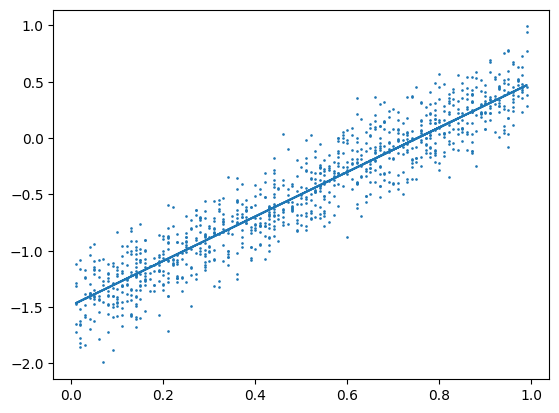

In [6]:
plt.scatter(Xtrue,  ytrue, s=0.8)
plt.plot(Xtrue, make_line(xdata = Xtrue, slope = 1.974, intercept = -1.485));
# randomly decide the slope value and intercept value that is close to the original value

### Step 2. The loss function

- We, as humans, can tell visually whether or not a line is "good" or "bad".
- The computer, which obviously can't "see" the picture, needs some kind of measure / number to let it know how "good" or "bad" its guess is.

In [7]:
def mse(ytrue, ypred): 
    """This function calculates the Mean Squared
    Errors between the true and the predicted data.
    This will be our loss function."""

    vals = []

    for i in range(len(ytrue)):

        vals.append((ytrue[i]-ypred[i])**2)
    
    error = sum(vals)/len(ytrue)

    return error

#### What we did so far:

- found a way to make a line given any slope and intercept
- based on the resulting line, we can calculate the error between that line and the actual points
    - so this helps us determine how good or bad our line is (e.g. compared to a previous attempt)

#### What do we need to do now?

- now that we have a way of determining the "goodness" or "badness" of a line given some initial guess at the slope and intercept, we need a way to figure out how to actually change the slope and intercept in such a way that our error gets lower!!

### Step 3. Calculating the gradient.

In [8]:
def calc_gradient(Xdata, ytrue, slope, intercept):
    """This function gives the direction of the gradient 
    given the parameters. The loss function is defined as
    mse by default."""

    """step_size and the first line"""
    dw = 0.00001
    ypred = make_line(Xdata, slope, intercept) #first guess!

    '''tweak first parameter'''
    slope_change = slope + dw
    # calculate predictions using intercept and change of slope
    ypred_slope = make_line(Xdata, slope_change, intercept) #just tweaking slope!!!
    deriv_slope = (mse(ytrue, ypred_slope) - mse(ytrue, ypred)) / dw

    '''tweak second parameter'''
    intercept_change = intercept + dw
     # calculate predictions using change of intercept and slope
    ypred_intercept = make_line(Xdata, slope, intercept_change)
    deriv_intercept = (mse(ytrue, ypred_intercept) - mse(ytrue, ypred)) / dw

    return [deriv_slope, deriv_intercept] # return both derivations as a list

The function above basically gives us directionality: 
- Would the error go up or down if I increased slope ever so slightly?
- Would the error go up or down if I increased intercept ever so slightly?

### Now time for the algorithm!!

### Step 4. Implementing the Gradient Descent Algorithm

Repeat the following steps `MAX_ITER` times.
In each iteration of the loop:

      1. Calculate the gradient of the loss function
         with respect to each model parameter.
      2. If the gradient becomes really close to zero,
         break out of the loop.
      3. For each model parameter,
         - calculate the updated parameter value
           using the formula from above.
         - overwrite the value with its updated value.
      4. Print all variables to check if they
         are converging to their expected values.

Iteration Number: 0, Deriv_Slope:\-3.0524205449466986,SLOPE: -7.390,        INTERCEPT: 2.584
Iteration Number: 20, Deriv_Slope:\-0.7044934438038551,SLOPE: -3.384,        INTERCEPT: 1.354
Iteration Number: 40, Deriv_Slope:\-0.42114320628616747,SLOPE: -1.209,        INTERCEPT: 0.203
Iteration Number: 60, Deriv_Slope:\-0.2517581556726878,SLOPE: 0.091,        INTERCEPT: -0.485
Iteration Number: 80, Deriv_Slope:\-0.15050027645790998,SLOPE: 0.868,        INTERCEPT: -0.896
Iteration Number: 100, Deriv_Slope:\-0.08996861747684325,SLOPE: 1.332,        INTERCEPT: -1.142
Iteration Number: 120, Deriv_Slope:\-0.05378297186914293,SLOPE: 1.610,        INTERCEPT: -1.289
Iteration Number: 140, Deriv_Slope:\-0.032151300565635976,SLOPE: 1.776,        INTERCEPT: -1.377
Iteration Number: 160, Deriv_Slope:\-0.01921995181550229,SLOPE: 1.875,        INTERCEPT: -1.429
Iteration Number: 180, Deriv_Slope:\-0.01148963000643932,SLOPE: 1.935,        INTERCEPT: -1.461
CONVERGED: Found threshold sensitivity, slope= 1

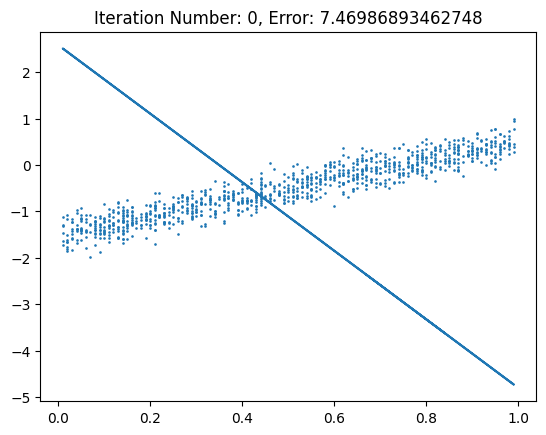

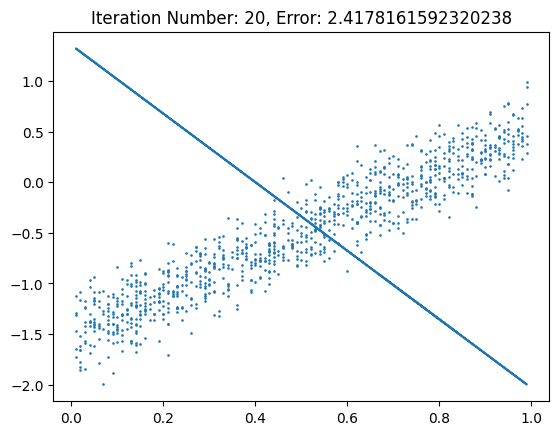

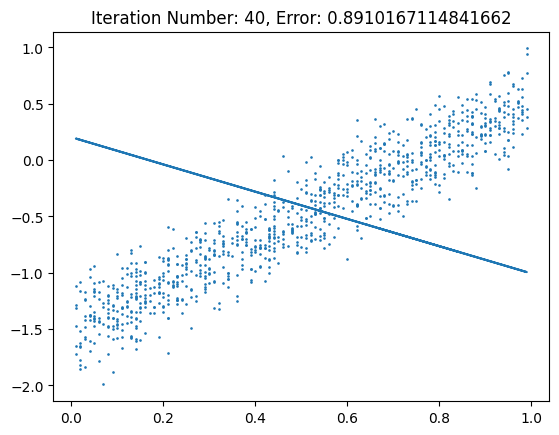

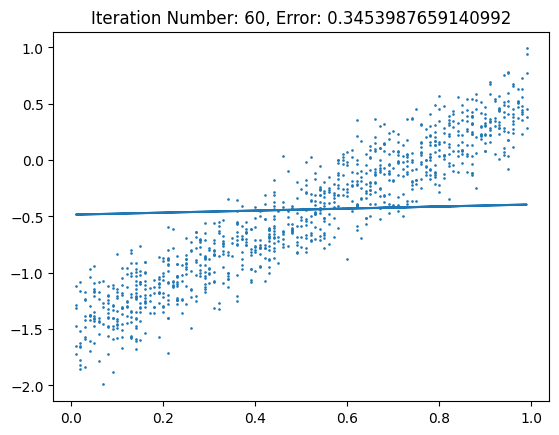

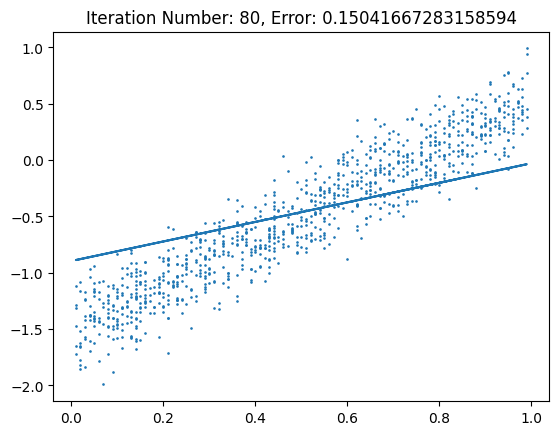

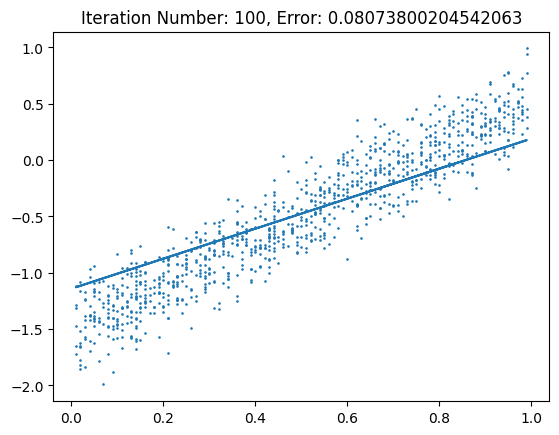

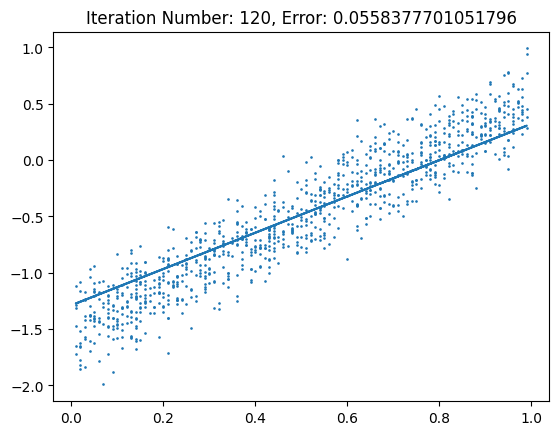

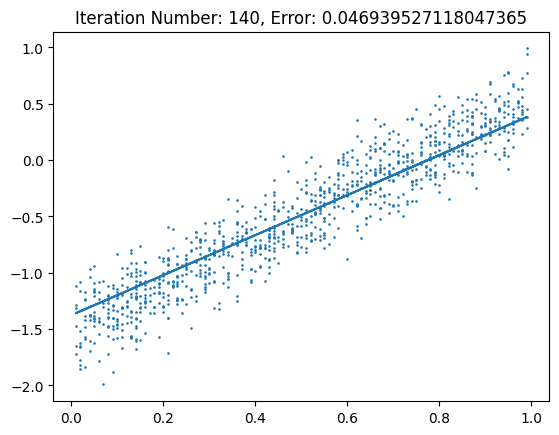

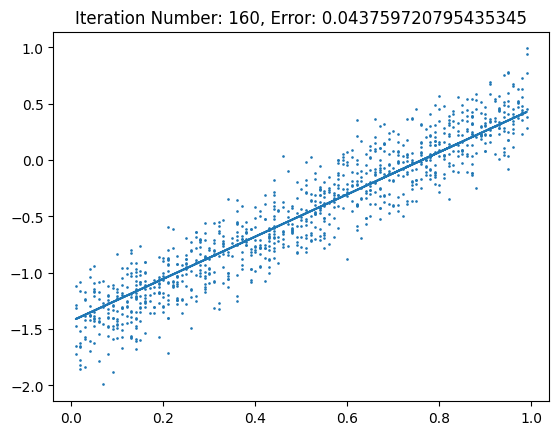

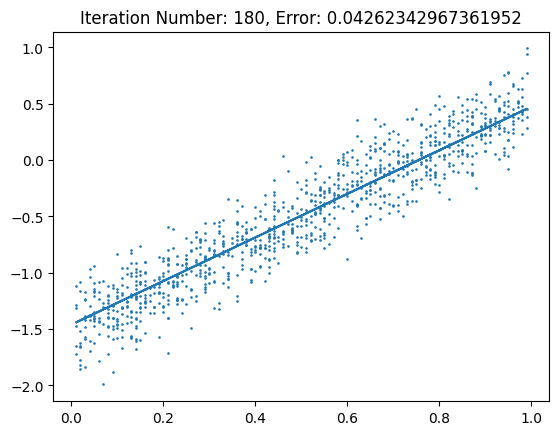

In [11]:
import time
import imageio
import math

images = []

SLOPE_START = -8.0
INTERCEPT_START = 2.0

# Parameters for the gradient descent
# Arbitrary learning rate, iterations, threshold that I can accept as it converged.
LR = 0.2
MAX_ITER = 600
THRESHOLD = 0.01

#Threshold is the value for the gradient that you can accept as minimum.

# We hope that this algorithm will eventually take us 
# to the best possible parameters:
# i.e. slope ~ 2.0 and intercept ~ -1.5

for i in range(MAX_ITER):
    
    time.sleep(0.02)
        
    """1. In each iteration of the loop, calculate the gradient 
    of your loss function."""
    
    deriv_slope, deriv_intercept = calc_gradient(Xtrue, ytrue, SLOPE_START, INTERCEPT_START)
        
    """2. If the gradient becomes smaller than some pre-determined 
    threshold value, break out of the loop."""
        
    if ((abs(deriv_slope) <= abs(THRESHOLD)) & (abs(deriv_intercept) <= abs(THRESHOLD))): 
        
        print("CONVERGED: Found threshold sensitivity, slope=",SLOPE_START, "intercept=",INTERCEPT_START )
        print("Derivative",deriv_slope, deriv_intercept, THRESHOLD)
        break
   
    else:        
        
        """2. For each parameter, multiply the corresponding partial derivative by the
        learning rate, then negate it. Add the resulting product to
        the previous value of the parameter to get the updated parameter value."""
    
        SLOPE_NEW = (-deriv_slope * LR + SLOPE_START)
        INTERCEPT_NEW = (-deriv_intercept * LR + INTERCEPT_START)

        """3. At the end of each iteration, overwrite the values of each parameter
        with its modified value."""
    
        SLOPE_START = SLOPE_NEW
        INTERCEPT_START = INTERCEPT_NEW
  
    if i % 20 == 0:
        
        print(f"Iteration Number: {i}, Deriv_Slope:\{deriv_slope},SLOPE: {SLOPE_NEW:.3f},\
        INTERCEPT: {INTERCEPT_NEW:.3f}")
        
        
        plt.figure()
        ypred = make_line(Xtrue, SLOPE_START, INTERCEPT_START)
        plt.plot(Xtrue, ypred)
        plt.title(f'Iteration Number: {i}, Error: {mse(ytrue, ypred)}')
        plt.scatter(Xtrue, ytrue, s=0.8)
        filename = f'iter_{i}.png'.format(i)
     #   plt.savefig(filename)  
     #   images.append(imageio.imread(filename))
        
#imageio.mimsave('output.gif', images, fps=10)

print('Printed GIF!!!')
        



<hr style="border:2px solid black">

## References

- [Gradient Descent, by IBM Cloud Education](https://www.ibm.com/cloud/learn/gradient-descent)

- [Visualizing the gradient descent method](https://scipython.com/blog/visualizing-the-gradient-descent-method/)

- [Andrew Ng's Lectures](https://www.youtube.com/watch?v=kHwlB_j7Hkc&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=4) watch this one @@

In [10]:
pip install imageio

  Using cached imageio-2.27.0-py3-none-any.whl (3.4 MB)
Note: you may need to restart the kernel to use updated packages.
